### Datasets Analysis: 

In [1]:
import os,random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
DATA_DIR = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset\\'
datasetList = ['Dsads','Ucihar','Uschad','Pamap2']
n_classes = 4 

In [7]:
def normalize(X,Y):
    newX = []
    newY = []
    tol = 3
    m = np.array([np.mean(X[:,:, i]) for i in range(X.shape[-1])])
    std = np.array([np.std(X[:,:,i]) for i in range(X.shape[-1])])
    out_up = m + tol*std
    out_down = m - tol*std

    for sample,label in zip(X,Y):
        #check if this sample is an outlier:
        min = np.min(sample,axis = 0)
        max = np.max(sample,axis = 0)
        if ((out_up < max) + 0).sum() + ((out_down > min) + 0).sum() == 0:
            # normalization [-0.5, 0.5]
            new_sample = (sample - min)/(max-min) - 0.5
            newX.append(new_sample)
            newY.append(label)
    return np.array(newX),np.array(newY)

In [3]:
myActNames = {
    'walking':'walking' ,
    'walking forward': 'walking',
    'ascending stairs':'ascending stairs',
    'walking up': 'ascending stairs',
    'descending stairs':'descending stairs',
    'walking down': 'descending stairs',
    'sitting':'sitting',
    'standing':'standing',
    'lying':'lying',
    'lying on back':'lying',
    'lying on right':'lying',
    'laying':'lying',
    'sleeping':'lying'
}
myActNames = {
	'walking': 0,
	'walking forward': 0,
	'ascending stairs': 1,
	'walking up': 1,
	'descending stairs': 2,
	'walking down': 2,
	'lying':3,
	'lying on back':3,
	'lying on right':3,
	'laying':3,
	'sleeping':3,
	'sitting': 4,
	'standing': 5,
}
idx2Name = {
	0:'walking',
	1:'ascending stairs',
	2:'descending stairs',
	3:'lying',
}
def standarizeActName(y):
    y1 = list(map(lambda x: x.split('-')[-1], y))
    return np.array(list(map(lambda x: myActNames[x], y1)))
    

def readDataset(dataset_name):
    file = os.path.join(DATA_DIR, f'{dataset_name}_f25_t2_{n_classes}actv.npz')
    with np.load(file, allow_pickle=True) as tmp:
        X = tmp['X'].astype('float32')
        y = tmp['y']
    Y = standarizeActName(y)
    return X[:,0,:,:],Y

In [3]:
_,y = readDataset(datasetList[0])
a = pd.value_counts(y)
df = pd.DataFrame(index =datasetList , data = [],columns = a.index.to_list())
for dat in datasetList:
    _,y = readDataset(dat)
    a = pd.value_counts(y)
    df.loc[dat] = a.values.tolist()


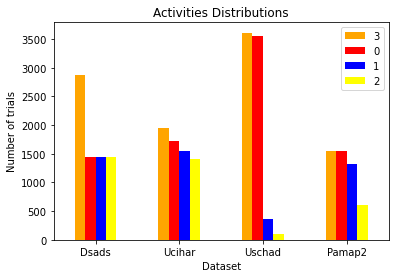

In [9]:
col = {0:'red',1:'blue',2:'yellow',3:'orange'}
fig = df.plot.bar(color = col,rot =0,title = 'Activities Distributions')
fig.set_xlabel('Dataset')
fig.set_ylabel('Number of trials')
plt.savefig('../figures/act_dist.png')

In [13]:
# x,y  = readDataset('Pamap2')
# x,y = normalize(x,y)
# pd.value_counts(y)

1    891
0    873
2    826
3    468
dtype: int64

### Values Distributions:
Accelerometer Data

In [11]:
# You can select one activity if necessary: 
x_axis = []
y_axis = []
z_axis = []
for dat in datasetList:
    x,y = readDataset(dat)
    x = x[:,:,0:3]  
#     idx = np.where(y==0)[0]
#     x = x[idx]
    x_axis.append(x[:,:,0].flatten())
    y_axis.append(x[:,:,1].flatten())
    z_axis.append(x[:,:,2].flatten())

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

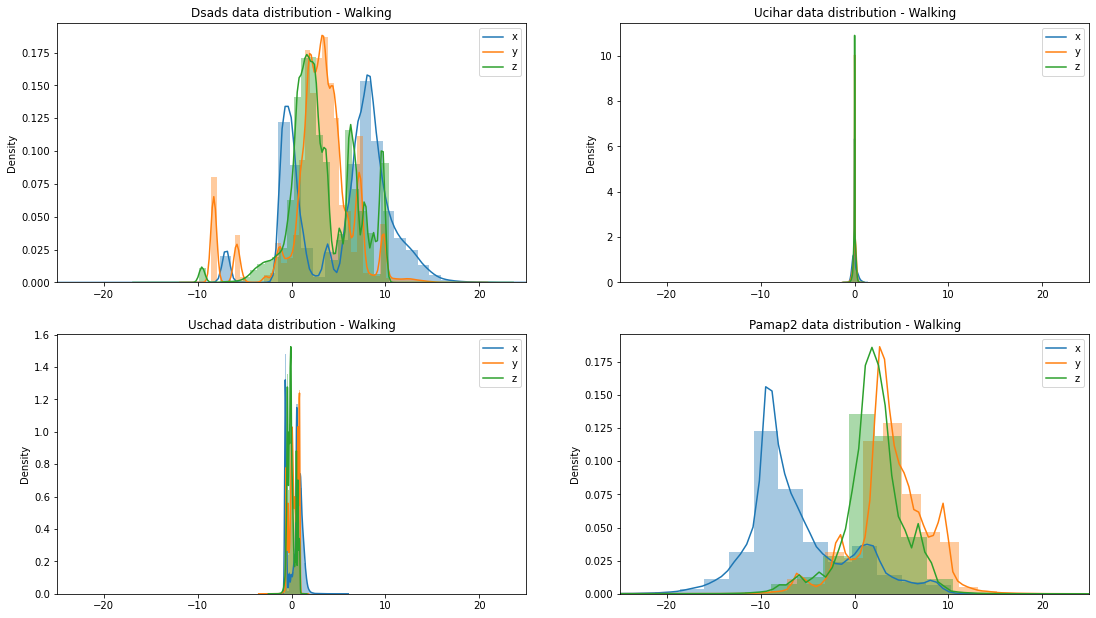

In [12]:

lim = 25
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
for i,dat in enumerate(datasetList):
    sns.distplot(x_axis[i],ax = axs[int(i/2),i%2])
    sns.distplot(y_axis[i],ax =axs[int(i/2),i%2])
    sns.distplot(z_axis[i],ax = axs[int(i/2),i%2])
    axs[int(i/2),i%2].set_title(f'{dat} data distribution - Walking')
    axs[int(i/2),i%2].legend(['x','y','z'])
    axs[int(i/2),i%2].set_xlim([-lim, lim])


In [56]:
# DATA_DIR = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset_test\\'
# def readDataset(dataset_name):
#     file = os.path.join(DATA_DIR, f'{dataset_name}_f25_t2_FSL.npz')
#     with np.load(file, allow_pickle=True) as tmp:
#         X = tmp['X'].astype('float32')
#         Y = tmp['Y']
#     #Y = standarizeActName(y)
#     return X[:,0,:,:],Y
# x,y = readDataset('Pamap2')
# idx = np.where(y =='Pamap2-walking')[0].tolist() +np.where(y =='Pamap2-descending stairs')[0].tolist()
# idx += np.where(y =='Pamap2-ascending stairs')[0].tolist() + np.where(y =='Pamap2-lying')[0].tolist()



c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

(-25.0, 25.0)

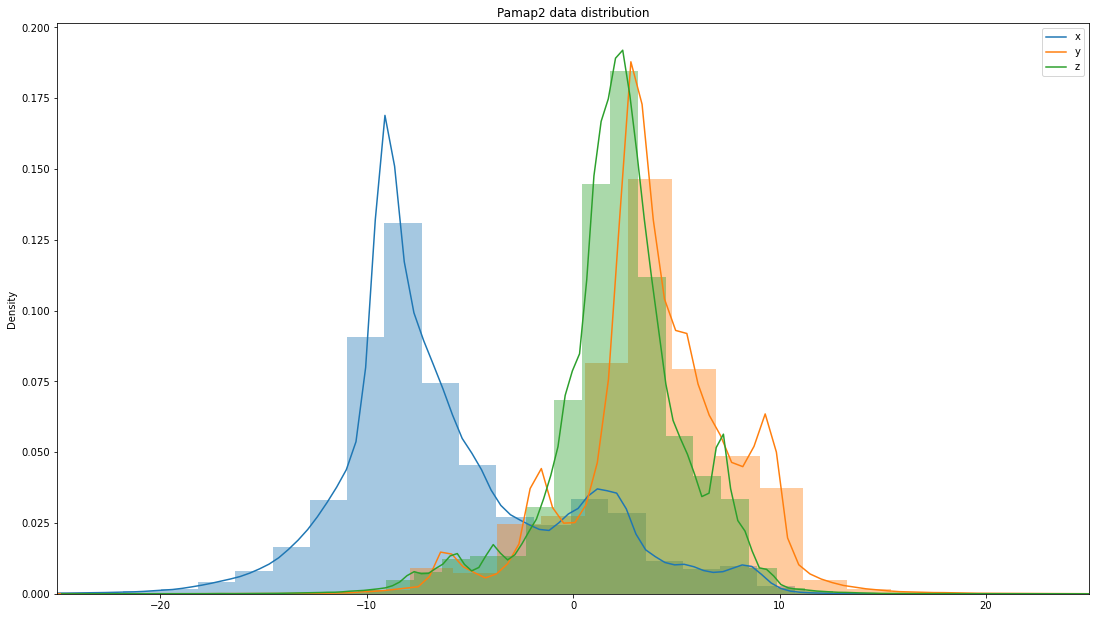

In [59]:

lim = 25
i = 0
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
x_axis = x_pama[:,:,0].flatten()
y_axis = x_pama[:,:,1].flatten()
z_axis = x_pama[:,:,2].flatten()
sns.distplot(x_axis,ax = axs)
sns.distplot(y_axis,ax =axs)
sns.distplot(z_axis,ax = axs)
axs.set_title(f'{dat} data distribution')
axs.legend(['x','y','z'])
axs.set_xlim([-lim, lim])

In [66]:
x_axis.min()

-61.521255

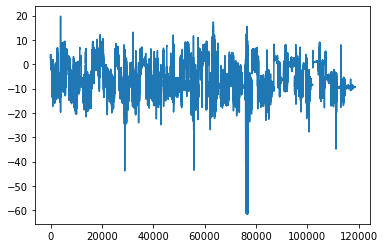

In [47]:
plt.plot(x_axis)

### Latant Space Analysis

In [2]:
import sys, os,argparse,pickle
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score
# from geomloss import SamplesLoss
sys.path.insert(0, '../')

from models.classifier import classifier


from dataProcessing.dataModule import SingleDatasetModule, CrossDatasetModule
from Utils.trainerTL_pl import TLmodel

from pytorch_lightning.loggers import MLFlowLogger
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from pytorch_lightning.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#### Ucihar to Dsads

In [3]:
source = 'Ucihar'
target = 'Uschad'
trainParams = {}
trainParams['input_shape'] = (2,50,3)

PATH_MODEL = f'../saved/TLmodel{source}_to_{target}_ot.ckpt'

dm_source = SingleDatasetModule(data_dir=DATA_DIR,
                        inputShape = trainParams['input_shape'],
                        datasetName = source,
                        n_classes = n_classes,
                        batch_size =128
                        )
dm_source.setup(Loso = False)
dm_target = SingleDatasetModule(data_dir=DATA_DIR,
                        inputShape = trainParams['input_shape'],
                        datasetName = target,
                        n_classes = n_classes,
                        batch_size = 128
                        )
dm_target.setup(Loso = False,split = True)


In [4]:
new_model = TLmodel.load_from_checkpoint(PATH_MODEL)
predictions = new_model.predict(dm_source,dm_target)


c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:

trueSource = predictions['trueSource']
predSource =  predictions['predSource']
latentSource =  predictions['latentSource']
trueTarget =  predictions['trueTarget']
predTarget =  predictions['predTarget']
latentTarget =  predictions['latentTarget']
probsTarget = predictions['probTarget']
classes = pd.unique(trueTarget)
N = len(classes)


In [6]:
source_embedded = TSNE(n_components=2).fit_transform(latentSource)
target_embedded = TSNE(n_components=2).fit_transform(latentTarget)



In [14]:
# pca = PCA(n_components=2)
# source_embedded = pca.fit_transform(latentSource)
# target_embedded = pca.fit_transform(latentTarget)

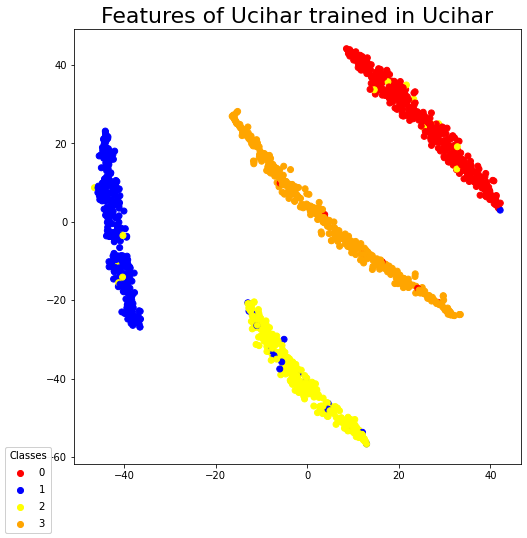

In [49]:
x = source_embedded[:,0]
y = source_embedded[:,1]
label = trueSource
colors = ['red','green','blue','purple','yellow','orange']
#fig = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize = (8,8))

#label = [idx2Name[a] for a in label]
scatter = ax.scatter(x, y, c=label,cmap=mpl.colors.ListedColormap(colors))

legend1 = fig.legend(*scatter.legend_elements(), loc="lower left" ,   title="Classes")
ax.add_artist(legend1)
plt.title(f'Features of {source} trained in {source}',fontsize = 22)
plt.savefig('featuresSource.png')


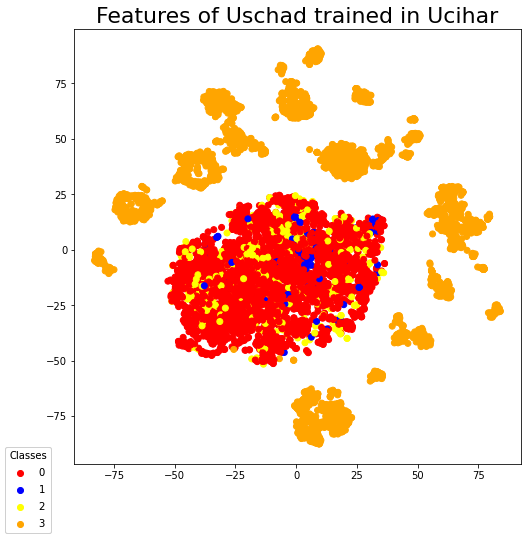

In [51]:
x = target_embedded[:,0]
y = target_embedded[:,1]
label = trueTarget
colors = ['red','green','blue','purple','yellow','orange']
fig, ax = plt.subplots(figsize = (8,8))
#label = [idx2Name[a] for a in label]


scatter = ax.scatter(x, y, c=label,cmap=mpl.colors.ListedColormap(colors))

legend1 = fig.legend(*scatter.legend_elements(), loc="lower left" ,   title="Classes")
ax.add_artist(legend1)
plt.title(f'Features of {target} trained in {source}',fontsize = 22)
plt.savefig('featuresTarget.png')



### 2d projection of source and target data

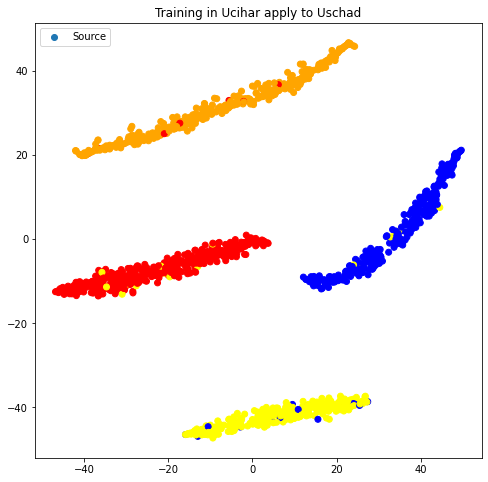

In [10]:
x = source_embedded[:,0]
y = source_embedded[:,1]
label = trueSource
colors = ['red','green','blue','purple','yellow','orange']
fig = plt.figure(figsize=(8,8))
plt.title(f'Training in {source} apply to {target}')
plt.scatter(x, y, c=label, cmap=mpl.colors.ListedColormap(colors),label = 'Source')
#plt.scatter(target_embedded[:,0],target_embedded[:,1], c = 'gray',label = 'Target')
plt.legend(loc="upper left")
# plt.xlim([-10,40])
# plt.ylim([-15,15])
#plt.savefig('../saved/firstTransferResult.png')


### 2d projection with target labels

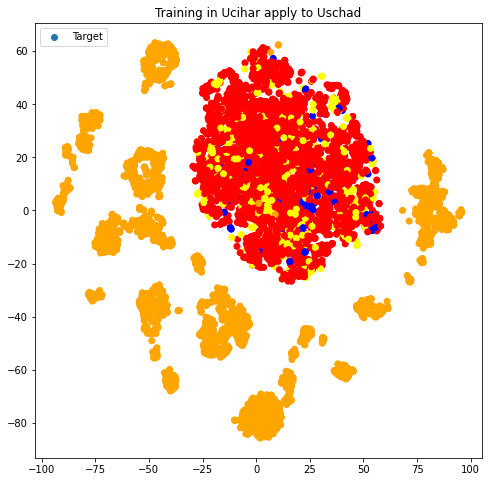

In [11]:
x = target_embedded[:,0]
y = target_embedded[:,1]
label = trueTarget
colors = ['red','green','blue','purple','yellow','orange']
fig = plt.figure(figsize=(8,8))
plt.title(f'Training in {source} apply to {target}')
plt.scatter(x, y, c=label, cmap=mpl.colors.ListedColormap(colors),label = 'Target')
#plt.scatter(target_embedded[:,0],target_embedded[:,1], c = 'gray',label = 'Target')
plt.legend(loc="upper left")
# plt.xlim([-10,40])
# plt.ylim([-15,15])
#plt.savefig('../saved/firstTransferResult.png')

In [15]:
from sklearn.metrics import confusion_matrix as CM
import seaborn as sn


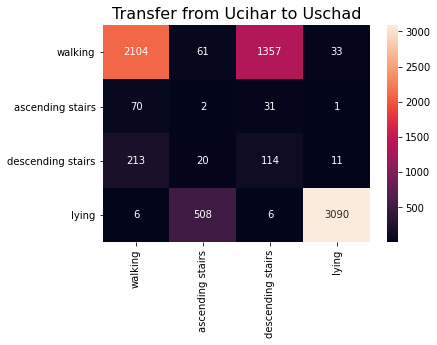

In [70]:

a = CM(trueTarget,predTarget)
sn.heatmap(a,annot=True,fmt = '.0f',xticklabels = idx2Name.values(),yticklabels = idx2Name.values())
plt.title(f'Transfer from {source} to {target}',fontsize = 16)
plt.savefig('cm.png')

In [60]:
idx2Name


{0: 'walking', 1: 'ascending stairs', 2: 'descending stairs', 3: 'lying'}

In [15]:
accuracy_score(trueTarget,predTarget)

0.6962108299462436

In [20]:
5300/7500

0.7066666666666667

### Classes distances:

In [18]:
classes = pd.unique(trueTarget)
N = len(classes)
distances = pd.DataFrame(np.zeros([N,N]))
for i_cls in range(N):
    clas_idx = np.where(trueTarget == classes[i_cls])[0]
    data_class_t = latentTarget[clas_idx]
    centroid_t = np.mean(data_class_t,axis = 0)
    for j_cls in range(N):
        clas_idx = np.where(trueSource == classes[j_cls])[0]
        data_class_s = latentSource[clas_idx]
        centroid_s = np.mean(data_class_s,axis = 0)
        distances.iloc[i_cls,j_cls] = (np.sum((centroid_t - centroid_s)**4))**.25
        
        
        
        
    
    

In [19]:
distances


,0,1,2,3
0,1.946652,2.661746,2.088259,2.268477
1,2.631985,2.172038,2.877723,2.238351
2,2.054640,2.702284,2.181611,2.279362
3,1.822866,2.542710,2.155310,2.181050


### K means: 

In [21]:
from sklearn.cluster import KMeans


In [32]:

n_cls = 5
distances = pd.DataFrame(np.zeros([N*n_cls,N*n_cls]))
centroids_t = {}
for i_cls in range(N):
    clas_idx = np.where(trueTarget == classes[i_cls])[0]
    data_class_t = latentTarget[clas_idx]
    kmeans = KMeans(n_clusters=n_cls, random_state=0).fit(data_class_t)
    j = 0
    for k in kmeans.cluster_centers_:
        key_ = f'classe_{i_cls}_clust_{j}'
        centroids_t[key_] = k
        j = j+1
centroids_s = {}
for i_cls in range(N):
    clas_idx = np.where(trueSource == classes[i_cls])[0]
    data_class_s = latentTarget[clas_idx]
    kmeans = KMeans(n_clusters=n_cls, random_state=0).fit(data_class_s)
    j = 0
    for k in kmeans.cluster_centers_:
        key_ = f'classe_{i_cls}_clust_{j}'
        centroids_s[key_] = k
        j = j+1
    


In [33]:

distances.columns = centroids_t.keys()
distances.index = centroids_s.keys()

    

In [43]:
for ks,its in centroids_s.items():
    for kt, itt in centroids_t.items():
        distances.loc[ks,kt] = (np.sum((its - itt)**2))**.5

In [44]:
distances.iloc[:,5:9]

,classe_1_clust_0,classe_1_clust_1,classe_1_clust_2,classe_1_clust_3
classe_0_clust_0,3.205123,0.498933,3.215442,3.251485
classe_0_clust_1,0.668379,3.094014,0.547317,0.830545
classe_0_clust_2,8.468582,8.152426,8.285469,8.353608
classe_0_clust_3,6.297615,5.785908,6.089683,6.222733
classe_0_clust_4,5.232797,4.968499,4.964656,5.047171
classe_1_clust_0,0.780500,3.131065,0.487467,0.754132
classe_1_clust_1,4.889365,4.571282,4.605803,4.717548
classe_1_clust_2,9.389188,9.123828,9.212879,9.223593
classe_1_clust_3,6.557247,6.105820,6.350255,6.478590
classe_1_clust_4,3.265749,0.540275,3.259319,3.298705


#### Probabilits mensures

In [33]:
for i in classes:
    clas_idx = np.where(trueTarget == classes[i])[0]
    probs = probsTarget[clas_idx]  
    print(f'true class: {i}')
    print(np.mean(probs,axis = 0))
    print(np.std(probs,axis = 0))
    print('\n\n\n')

true class: 0
[0.35210013 0.16015048 0.29920563 0.18854362]
[0.1081164  0.05475024 0.104502   0.04610134]




true class: 1
[0.34249276 0.17183894 0.28179008 0.20387831]
[0.08560041 0.05400659 0.08848734 0.04151813]




true class: 3
[0.35784265 0.1791225  0.28295496 0.18007992]
[0.13299224 0.07375805 0.12343836 0.05692678]




true class: 2
[0.12583703 0.23660317 0.12295333 0.51460695]
[0.01975256 0.09615076 0.02217595 0.11458673]






In [35]:
probs

array([[0.13339725, 0.1933751 , 0.1136134 , 0.55961424],
       [0.13162358, 0.19410309, 0.11392902, 0.56034434],
       [0.13200913, 0.1943412 , 0.11475784, 0.55889183],
       ...,
       [0.11264796, 0.17376773, 0.1072538 , 0.6063305 ],
       [0.11114977, 0.21479046, 0.11218048, 0.56187934],
       [0.14073895, 0.19715123, 0.11492591, 0.5471839 ]], dtype=float32)